
En este repositorio se implementa la función odeint, modificando las tolerancias a los errores (atol, rtol),  con esto se visualizará el paso adaptativo que realiza la función con el fin de disminuir el costo computacional 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [19]:
# parámetros para el sistema considerado
g = 9.8
l = 0.1
#condiciones iniciales
theta_ini = 90*np.pi/180 # posición inicial del péndulo
theta_dot_ini = 0 # velocidad inicial del péndulo
condiciones_iniciales =np.array([theta_ini, theta_dot_ini]) # arreglo de condiciones iniciales
tiempo_inicial = 0
tiempo_final = 10

In [20]:
# sistema de ecuaciones diferenciales para el péndulo simple (sin aproximación para ángulos pequeños)
def sistema_(x,t,g,l):
    # x[0] equivale a theta, x[1] equivale a theta punto
    dtheta = x[1]
    domega = -(g/l)*np.sin(x[0])
    return np.array([dtheta, domega])

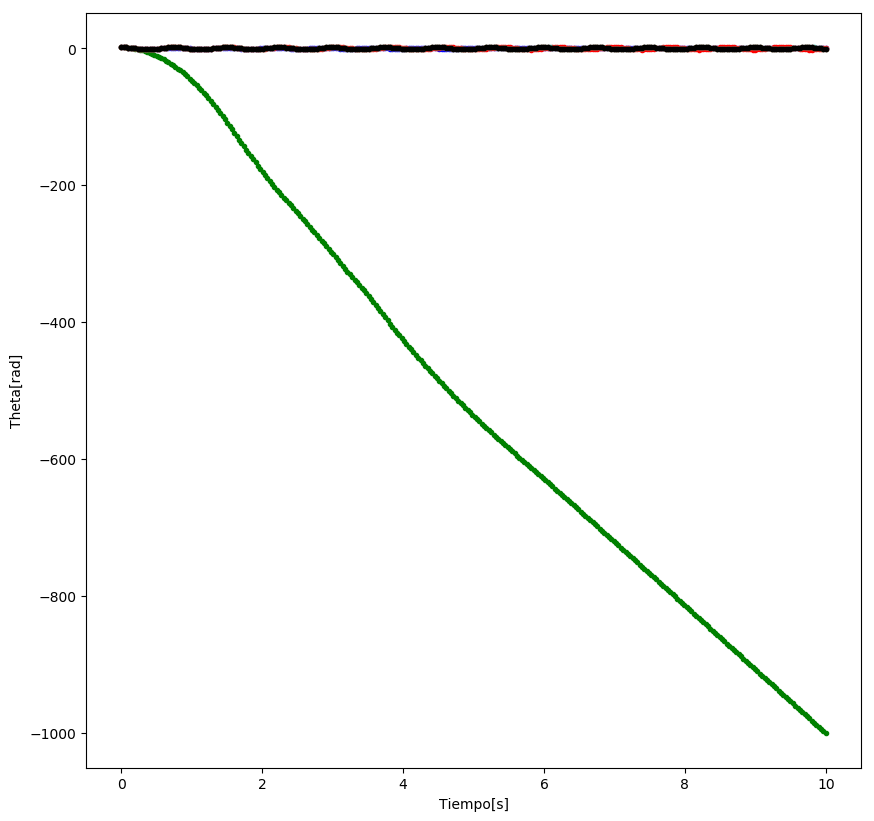

In [30]:
N = 300
atol_vec = np.array([1, 1e-1,1e-2, 1e-4, 1e-6, 1e-8, 1e-12]) # vector de error absoluto
rtol_vec = np.array([1, 1e-1,1e-2, 1e-4, 1e-6, 1e-8,1e-12]) # vector de error relativo
tolerancias  = np.zeros([len(atol_vec), N], dtype = float)
color_p = ['b', 'g', 'r', 'c', 'm', 'y','k']
tiempo = np.linspace(tiempo_inicial, tiempo_final, N)
plt.figure(figsize=(10,10),dpi =100)
for i in range(len(atol_vec)):
    integracion = odeint(sistema_, condiciones_iniciales, tiempo, args = (g,l), atol = atol_vec[i], rtol = rtol_vec[i]) # integración para h (t1 trae 3 elementos)
    tolerancias[i,:] = integracion[:,0]
    plt.plot(tiempo,integracion[:,0], '.',c = color_p[i])
plt.ylabel('Theta[rad]')
plt.xlabel('Tiempo[s]')    
plt.show()


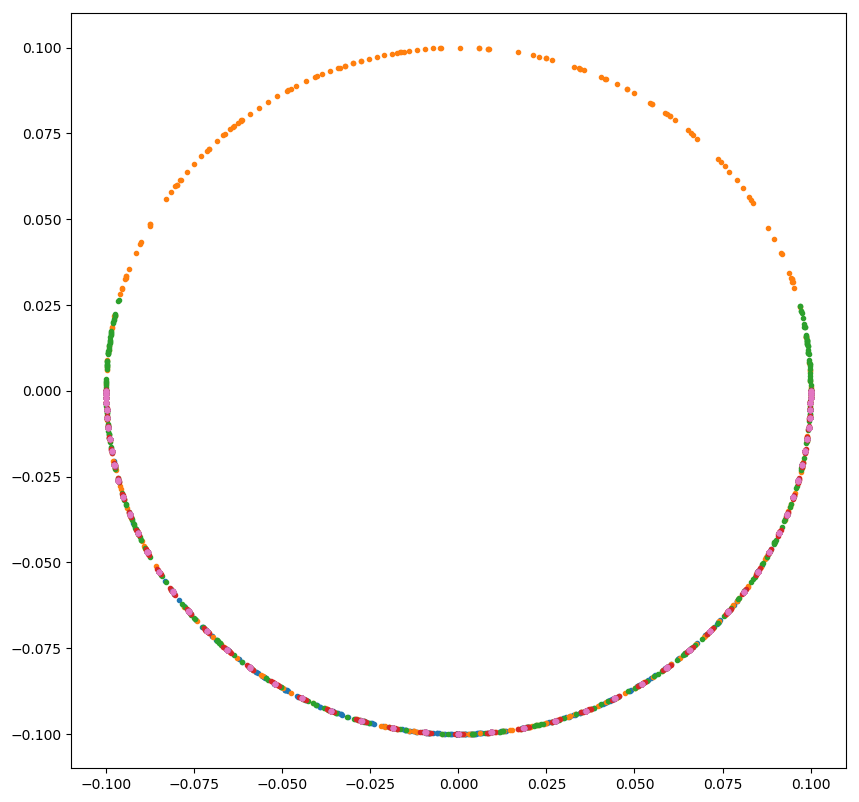

In [31]:
plt.figure(figsize=(10,10),dpi =100)
for j in range(len(rtol_vec)):
    plt.plot(l*np.sin(tolerancias[j,:]),-l*np.cos(tolerancias[j,:]),'.')
plt.show()

No se alcanza a apreciar el comportamiento, por ende se procede a mostrar solo la gráfica de la tolerancia más alta junto con la tolerancia más baja

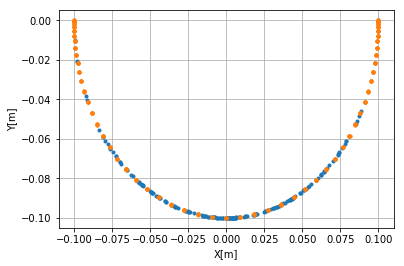

In [34]:
plt.plot(l*np.sin(tolerancias[0,:]),-l*np.cos(tolerancias[0,:]),'.')
plt.plot(l*np.sin(tolerancias[-1,:]),-l*np.cos(tolerancias[-1,:]),'.')
plt.ylabel('Y[m]')
plt.xlabel('X[m]')
plt.grid(True)
plt.show()

Se puede notar que el paso se hace más pequeño cuando la velocidad es más alta, ya que la variación de la posición es mayor, y el error de truncamiento es mucho mayor, por ende se hace necesario disminuir el tamaño del paso.

Se hace el mismo análisis para movimiento kepleriano.

In [63]:
def sistema_dos_cuerpos(x,t,G,M):
    # x[0] =x, x[1] =x_punto, x[2] = y, x[3] = y_punto
    denominador = ((x[0]**2)+(x[2]**2))**1.5
    dx = x[1]
    dy = x[3]
    dvx = -G*M*x[0]/denominador
    dvy = -G*M*x[2]/denominador    
    return np.array([dx,dy, dvx, dvy])


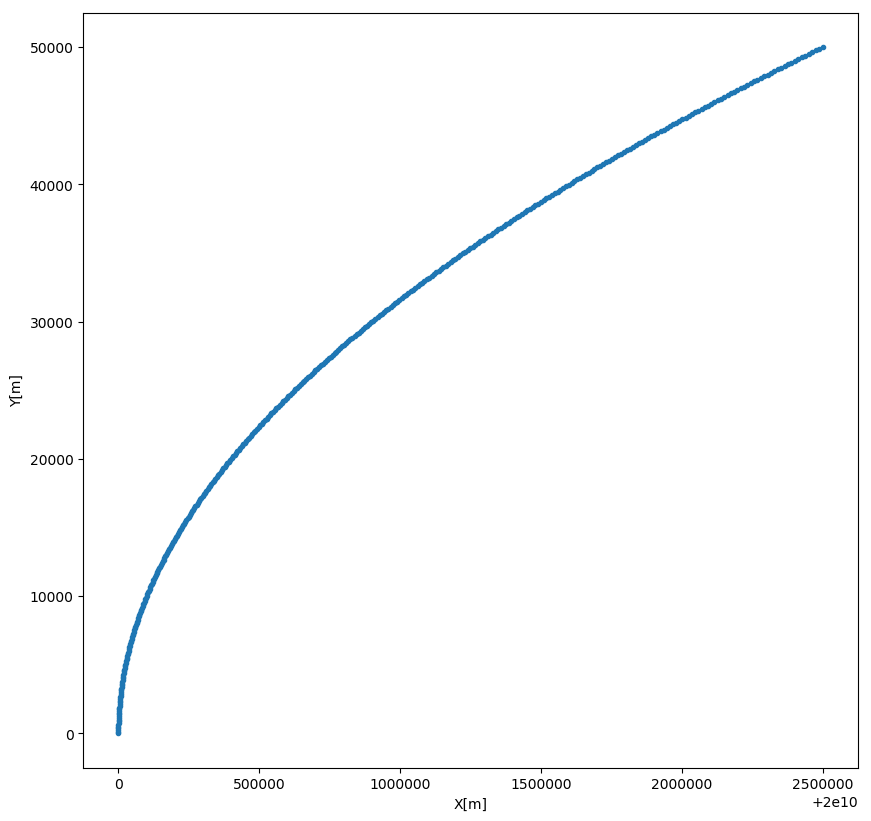

In [74]:
N = 400
tolerancias_x  = np.zeros([len(atol_vec), N], dtype = float)
tolerancias_y  = np.zeros([len(atol_vec), N], dtype = float)
tiempo_2 = np.linspace(0, 100, N)
condiciones_iniciales_2 =np.array([2e10,0,0,500]) # arreglo de condiciones iniciales
atol_vec = np.array([1, 1e-1,1e-2, 1e-4, 1e-6, 1e-8, 1e-13]) # vector de error absoluto
rtol_vec = np.array([1, 1e-1,1e-2, 1e-4, 1e-6, 1e-8,1e-13]) # vector de error relativo
M = 1.989e30 # masa del sol SI
G = 6.674e-11 # constante gravitacional SI
for u in range(len(atol_vec)):
    integracion = odeint(sistema_dos_cuerpos, condiciones_iniciales_2, tiempo_2, args = (G,M), atol = atol_vec[u], rtol = rtol_vec[u]) # integración para h (t1 trae 3 elementos)
    tolerancias_x[u,:] = integracion[:,0]
    tolerancias_y[u,:] = integracion[:,1]    
    #plt.plot(tiempo,integracion[:,0], '.',c = color_p[i])

plt.figure(figsize=(10,10),dpi =100)
#plt.plot(tolerancias_x[0,:],tolerancias_y[0,:],'.')
plt.plot(tolerancias_x[-1,:],tolerancias_y[-1,:],'.')
plt.ylabel('Y[m]')
plt.xlabel('X[m]')    
plt.show()